In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
data_filepath = "data.csv"
data = pd.read_csv(data_filepath, delimiter=";", decimal=",", parse_dates=["dt"])

In [3]:
data



,player_id,dt,battles,revenue
0,1761375733,2019-03-18,2,0.00
1,5142722405,2019-04-05,6,0.00
2,6336768620,2019-03-16,27,0.00
3,6769868103,2019-04-29,2,0.00
4,7080232366,2019-04-14,60,0.00
...,...,...,...,...
551011,1940077458,2017-07-05,2,0.06
551012,3256249793,2017-04-19,2,4.06
551013,1922651931,2017-05-20,2,12.76
551014,3850531476,2017-02-04,2,139.09


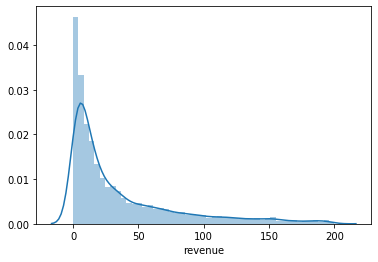

In [4]:
plt.figure()
sns.distplot(data.revenue[(data.revenue>0) & (data.revenue<300)])

In [5]:
data.max()

player_id             9996887345
dt           2019-12-05 00:00:00
battles                     1224
revenue                  1795.93
dtype: object

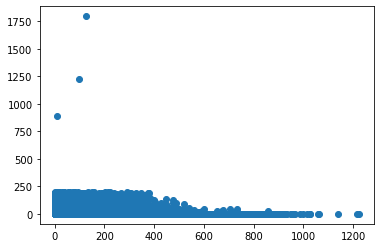

In [6]:
norm_revenue = data.revenue[data.revenue<300]
plt.scatter(data.battles, data.revenue)
plt.xlim = 250
plt.show()

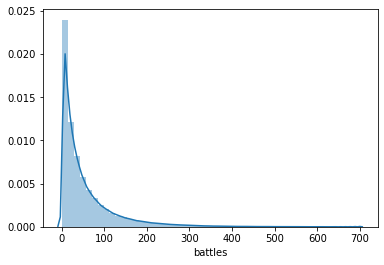

In [7]:
sns.distplot(data.battles[data.battles<700])

In [8]:
norm_revenue

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
           ...  
551011      0.06
551012      4.06
551013     12.76
551014    139.09
551015     11.17
Name: revenue, Length: 551013, dtype: float64

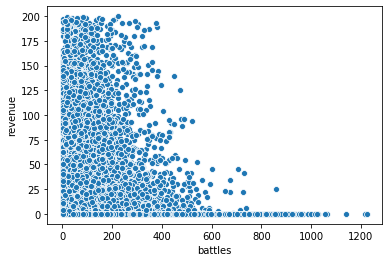

In [9]:
sns.scatterplot(data.battles, norm_revenue)

In [10]:
posit_revenue = data.revenue[data.revenue>0]
posit_revenue = posit_revenue[posit_revenue<300]


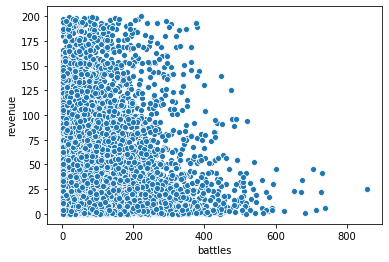

In [11]:
sns.scatterplot(data.battles, posit_revenue)

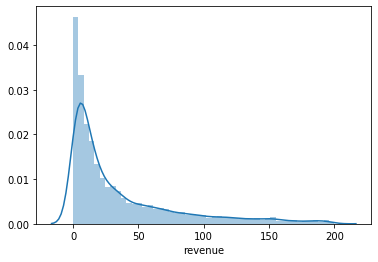

In [12]:
sns.distplot(posit_revenue)

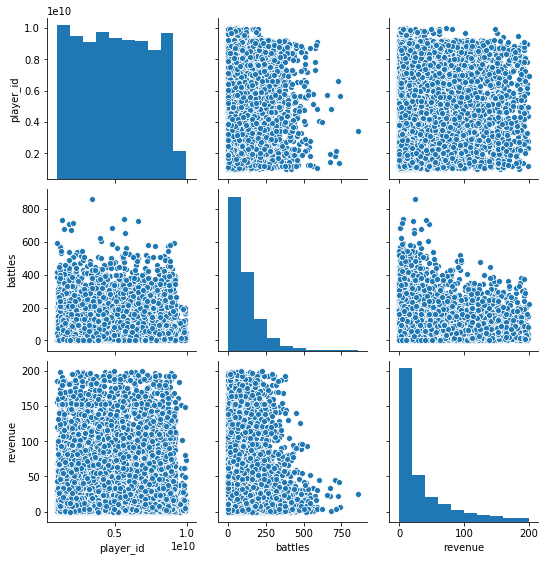

In [13]:
n_data = data[data.revenue<300]
n_data = n_data[n_data.revenue>0]
sns.pairplot(n_data)

In [14]:
n_data.describe()

,player_id,battles,revenue
count,9.598000e+03,9598.000000,9598.000000
mean,5.092953e+09,104.162534,35.625232
std,2.413367e+09,94.006693,43.215479
min,1.006963e+09,1.000000,0.010000
25%,2.963986e+09,37.000000,5.750000
50%,5.057963e+09,78.000000,16.870000
75%,7.177678e+09,143.000000,49.717500
max,9.985585e+09,857.000000,199.950000


In [15]:
n_data.groupby(["player_id"]).sum()

,battles,revenue
player_id,,
1006963480,106,63.10
1017582352,2,69.37
1020127117,34,156.06
1022027797,43,43.78
1023054377,2,7.54
...,...,...
9930884602,46,14.67
9943558245,21,6.70
9959739735,54,72.78


In [16]:
player_data=data.groupby(["player_id"]).agg({"battles": sum, "revenue":sum, "dt":'count'})
player_data

,battles,revenue,dt
player_id,,,
1000050800,16,0.0,2
1000075296,293,0.0,9
1000193607,1829,0.0,50
1000209014,1872,0.0,31
1000450220,3,0.0,1
...,...,...,...
9988343334,3,0.0,1
9989776616,30,0.0,1
9990811204,75,0.0,6


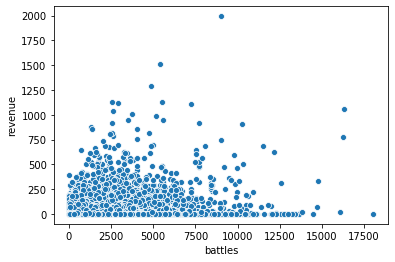

In [17]:
sns.scatterplot(player_data.battles, player_data.revenue)

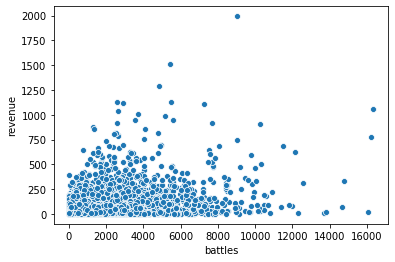

In [18]:
sns.scatterplot(player_data.battles, player_data.revenue[player_data.revenue>0])

In [19]:
date_data=data.sort_values("dt")
date_data=date_data.groupby(date_data.dt.dt.date).agg({"battles": sum, "revenue":sum, "player_id":'count'})
date_data


,battles,revenue,player_id
dt,,,
2017-01-04,146024,1938.44,2474
2017-01-05,304615,3364.51,5454
2017-02-04,149221,858.54,2426
2017-02-05,210789,1120.91,3928
2017-03-04,114642,892.50,2084
...,...,...,...
2019-11-04,130746,1489.80,2425
2019-11-05,93468,1482.93,1614
2019-12-03,81058,861.11,1376


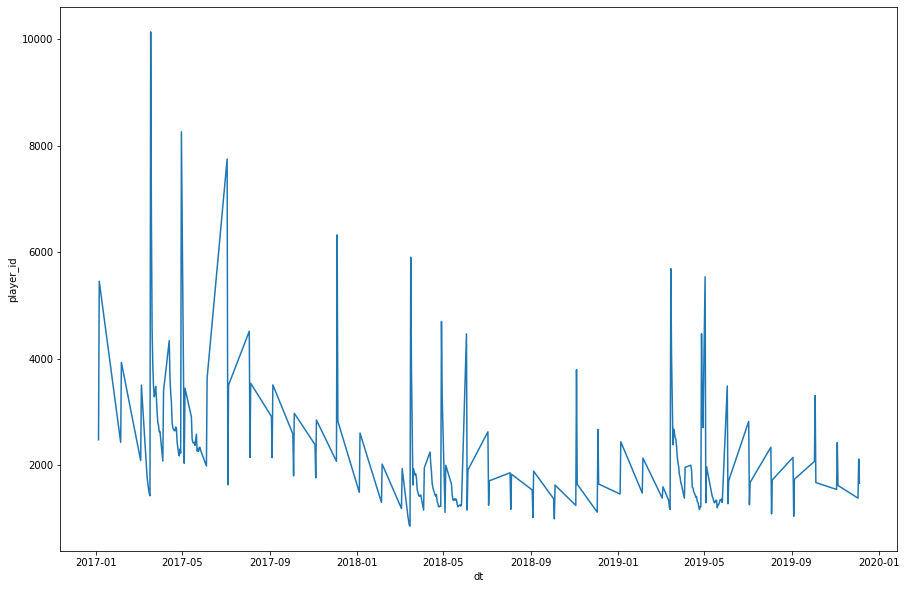

In [20]:
plt.figure(figsize=(15,10))
sns.lineplot(x=date_data.index, y=date_data.player_id)

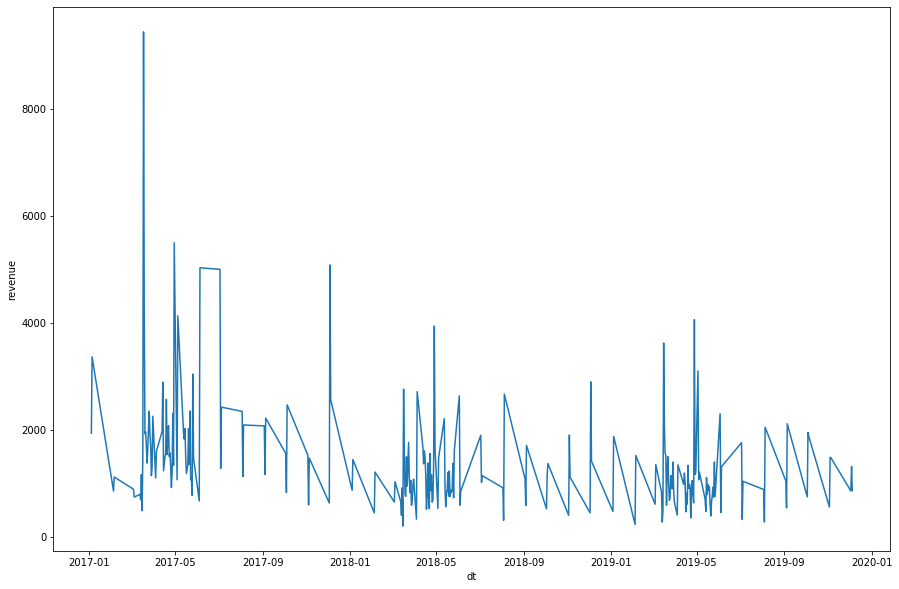

In [21]:
plt.figure(figsize=(15,10))
sns.lineplot(x=date_data.index, y=date_data.revenue)

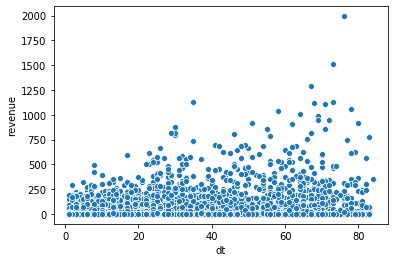

In [22]:
sns.scatterplot(player_data.dt, player_data.revenue)

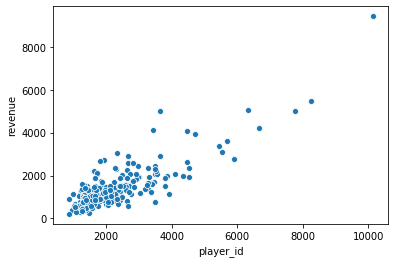

In [23]:
sns.scatterplot(date_data.player_id, date_data.revenue)

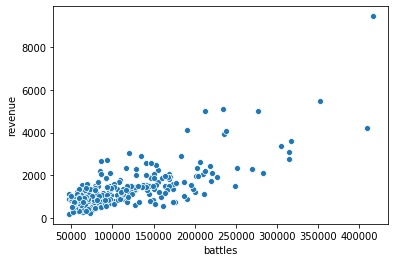

In [24]:
sns.scatterplot(date_data.battles, date_data.revenue)

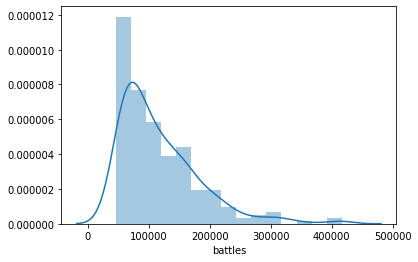

In [25]:
sns.distplot(date_data.battles)

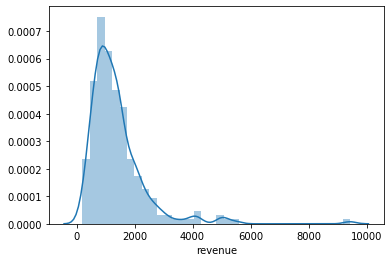

In [26]:
sns.distplot(date_data.revenue)

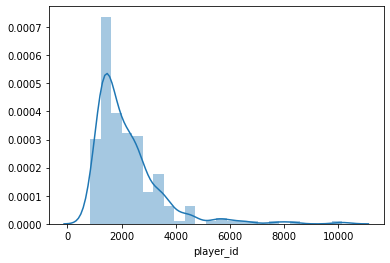

In [27]:
sns.distplot(date_data.player_id)

In [28]:
date_data.min()

battles      46707.00
revenue        205.03
player_id      851.00
dtype: float64

In [29]:
week_data = data
week_data['week']=data.dt.dt.week
week_data.sort_values("week")

,player_id,dt,battles,revenue,week
305792,4408049869,2017-01-05,43,0.0,1
231179,4868192291,2019-01-04,71,0.0,1
100315,5944301985,2017-01-05,25,0.0,1
23996,5157321477,2019-01-04,153,42.8,1
500111,7902539275,2017-01-04,45,0.0,1
...,...,...,...,...,...
536000,3654604599,2018-12-05,77,0.0,49
535999,8960519400,2018-12-04,62,0.0,49
148298,2357611940,2019-12-04,72,0.0,49
57501,4401493206,2018-12-03,10,0.0,49


In [30]:
week_data=week_data.groupby(week_data.week).agg({"battles": sum, "revenue":sum, "player_id":'count', "dt":'nunique'})

In [31]:
week_data

,battles,revenue,player_id,dt
week,,,,
1,903643,9983.37,15902,6
5,430247,2430.24,7650,3
6,291445,2970.54,5618,3
9,348977,2294.47,6766,3
10,229041,2998.90,4902,3
11,2836831,32079.91,51576,18
12,3210351,29453.18,56939,21
13,2008206,20351.75,35570,18
14,607838,7513.01,11893,6


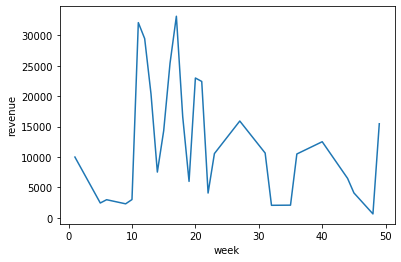

In [32]:
sns.lineplot(x=week_data.index, y=week_data.revenue)

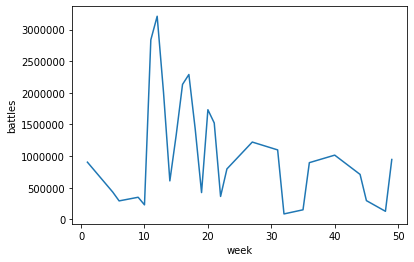

In [33]:
sns.lineplot(x=week_data.index, y=week_data.battles)

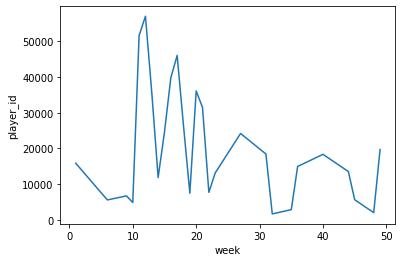

In [34]:
sns.lineplot(x=week_data.index, y=week_data.player_id)

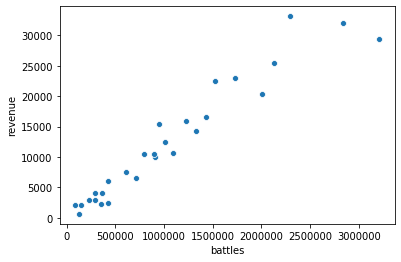

In [35]:
sns.scatterplot(x=week_data.battles, y=week_data.revenue)

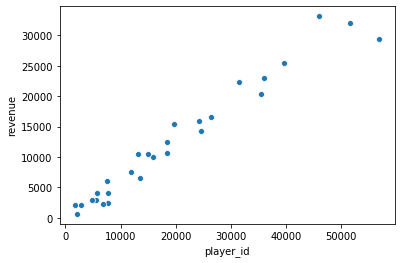

In [36]:
sns.scatterplot(x=week_data.player_id, y=week_data.revenue)

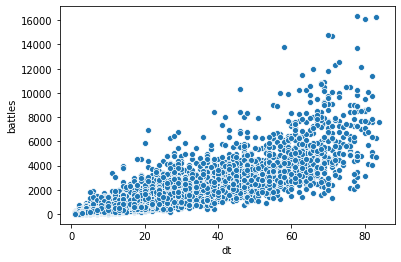

In [37]:
sns.scatterplot(player_data.dt, player_data.battles[player_data.revenue>0])

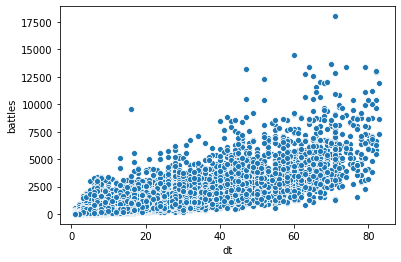

In [38]:
sns.scatterplot(player_data.dt, player_data.battles[player_data.revenue==0])

In [39]:
(player_data.battles[player_data.revenue>0]/player_data.dt[player_data.revenue>0]).mean()

61.75721801044166

In [40]:
(player_data.battles[player_data.revenue==0]/player_data.dt[player_data.revenue==0]).mean()

36.45306575057851

In [41]:
player_data.battles[player_data.revenue>0].median()

1096.0

In [42]:
player_data.battles[player_data.revenue==0].median()

88.0

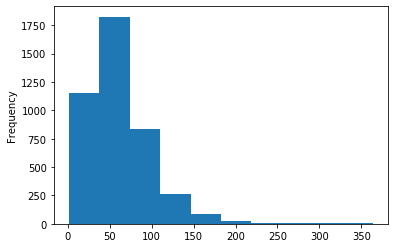

In [43]:
(player_data.battles[player_data.revenue>0]/player_data.dt[player_data.revenue>0]).plot.hist()

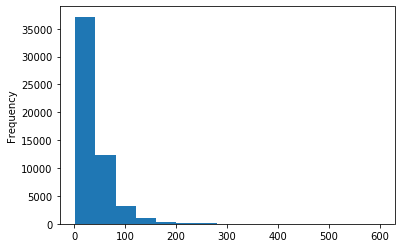

In [44]:
(player_data.battles[player_data.revenue==0]/player_data.dt[player_data.revenue==0]).plot.hist(bins=15)

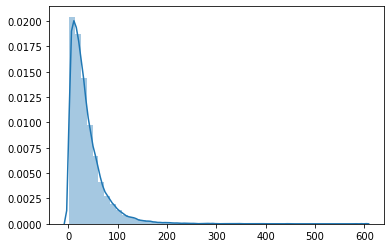

In [45]:
sns.distplot((player_data.battles[player_data.revenue==0]/player_data.dt[player_data.revenue==0]))

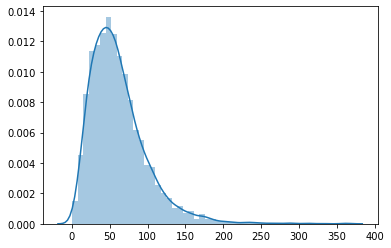

In [46]:
sns.distplot((player_data.battles[player_data.revenue>0]/player_data.dt[player_data.revenue>0]))

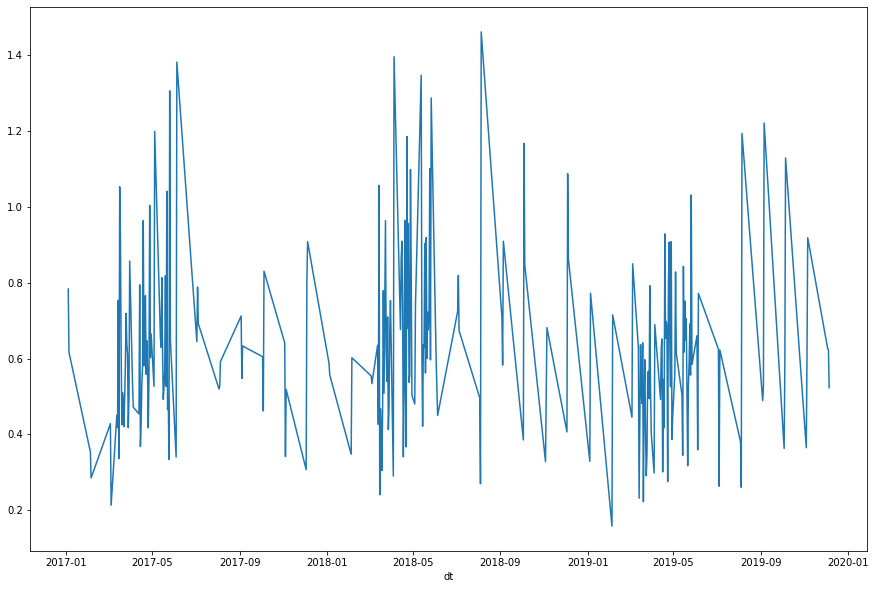

In [47]:
plt.figure(figsize=(15,10))
sns.lineplot(x=date_data.index, y=(date_data.revenue/date_data.player_id))

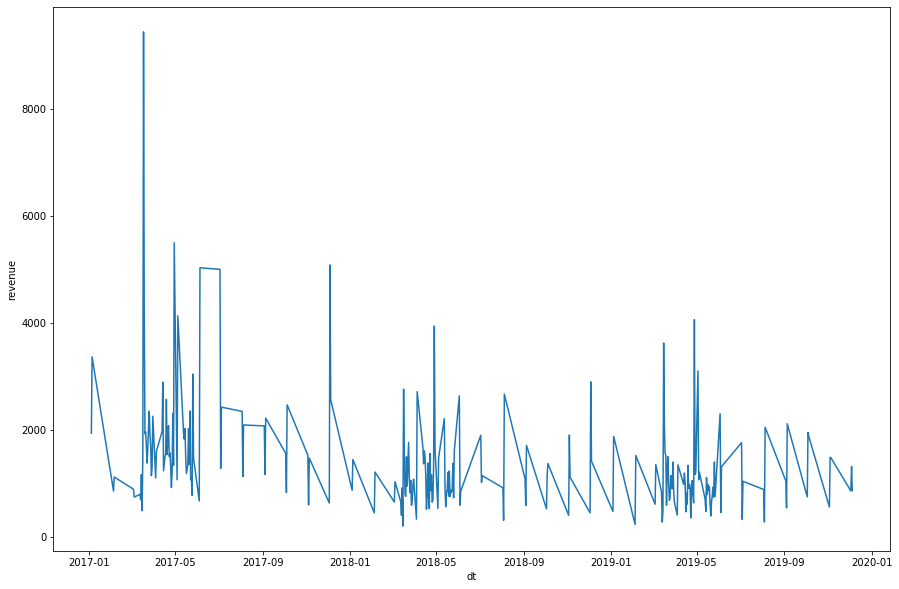

In [48]:
plt.figure(figsize=(15,10))
sns.lineplot(x=date_data.index, y=date_data.revenue)

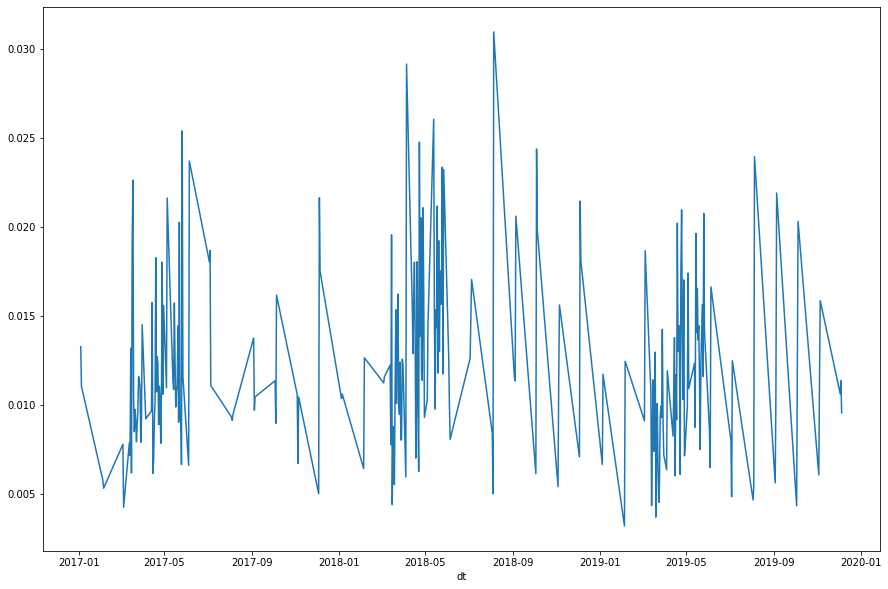

In [49]:
plt.figure(figsize=(15,10))
sns.lineplot(x=date_data.index, y=(date_data.revenue/date_data.battles))

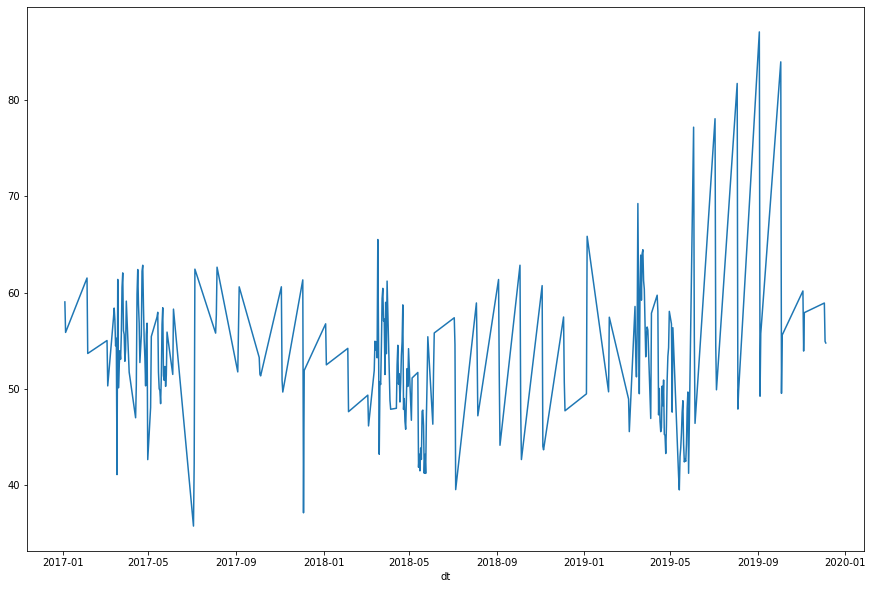

In [50]:
plt.figure(figsize=(15,10))
sns.lineplot(x=date_data.index, y=(date_data.battles/date_data.player_id))

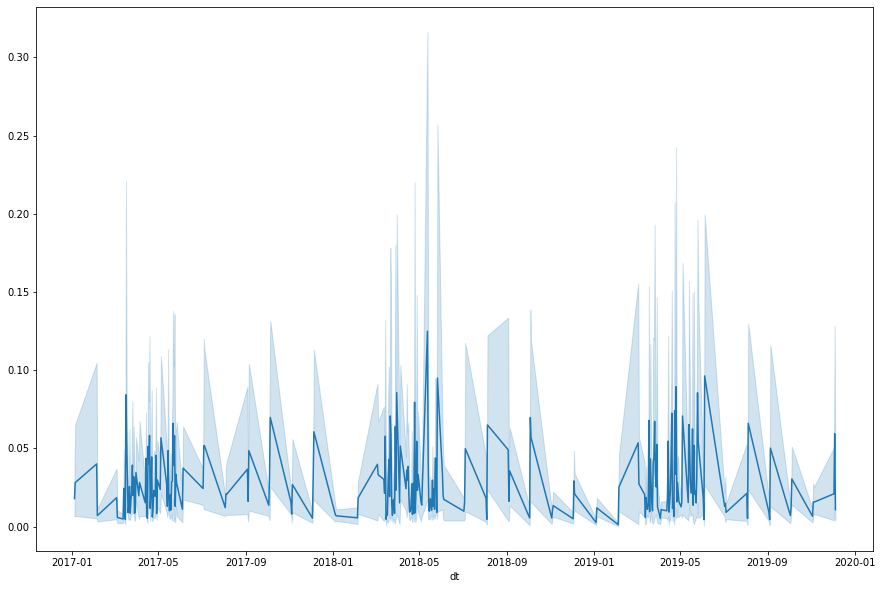

In [51]:
plt.figure(figsize=(15,10))
data=data.sort_values("dt")
sns.lineplot(x=data.dt, y=(data.revenue/data.battles))

In [52]:
week_data

,battles,revenue,player_id,dt
week,,,,
1,903643,9983.37,15902,6
5,430247,2430.24,7650,3
6,291445,2970.54,5618,3
9,348977,2294.47,6766,3
10,229041,2998.90,4902,3
11,2836831,32079.91,51576,18
12,3210351,29453.18,56939,21
13,2008206,20351.75,35570,18
14,607838,7513.01,11893,6


In [53]:
date_data


,battles,revenue,player_id
dt,,,
2017-01-04,146024,1938.44,2474
2017-01-05,304615,3364.51,5454
2017-02-04,149221,858.54,2426
2017-02-05,210789,1120.91,3928
2017-03-04,114642,892.50,2084
...,...,...,...
2019-11-04,130746,1489.80,2425
2019-11-05,93468,1482.93,1614
2019-12-03,81058,861.11,1376


In [66]:
from datetime import datetime
startdate = datetime.strptime("2017-02-15", "%Y-%m-%d").date()
endtime = datetime.strptime("2017-06-01", "%Y-%m-%d").date()

In [59]:
hot_time_data = data[(date_data.index > startdate) & (date_data.index < endtime)]

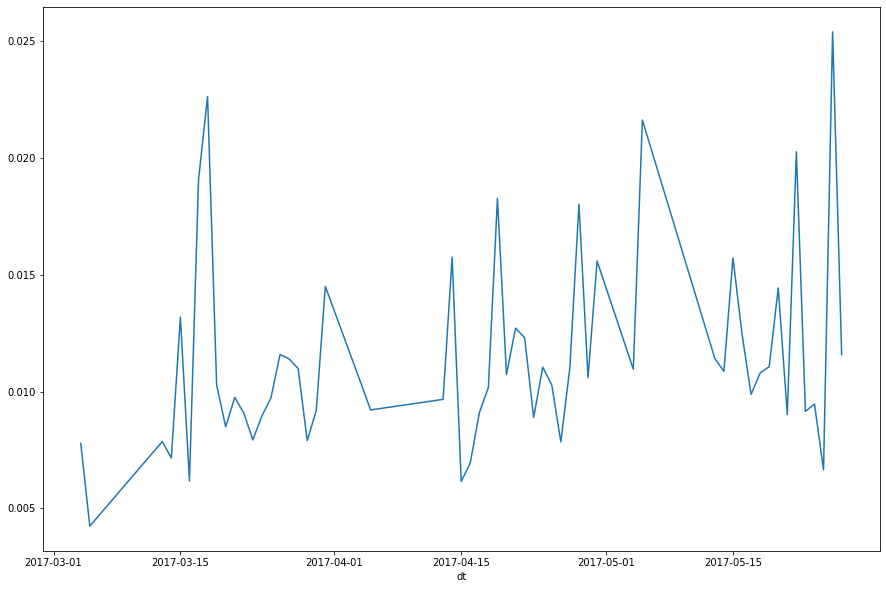

In [60]:
plt.figure(figsize=(15,10))
sns.lineplot(x=hot_time_data.index, y=(hot_time_data.revenue/hot_time_data.battles))

In [61]:
hot_time_data

,battles,revenue,player_id
dt,,,
2017-03-04,114642,892.50,2084
2017-03-05,176026,746.75,3500
2017-03-13,101411,797.38,1769
2017-03-14,97091,695.17,1663
2017-03-15,88362,1165.42,1546
2017-03-16,79947,493.68,1468
2017-03-17,78513,1496.94,1421
2017-03-18,416473,9429.84,10141
2017-03-19,408991,4208.70,6665


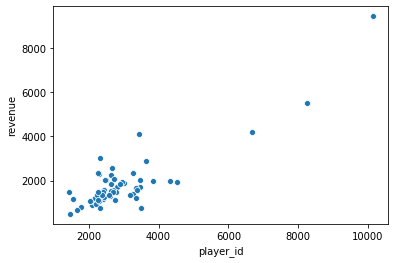

In [63]:
sns.scatterplot(x=hot_time_data.player_id, y=hot_time_data.revenue)

In [68]:
startdate = datetime.strptime("2017-02-15", "%Y-%m-%d")
endtime = datetime.strptime("2017-06-01", "%Y-%m-%d")
hot_time_data = data[(data.dt > startdate) & (data.dt < endtime)]

In [70]:
hot_time_data

,player_id,dt,battles,revenue,week
474335,1422326042,2017-03-04,9,0.0,9
277684,8078405963,2017-03-04,38,0.0,9
294869,4890771661,2017-03-04,1,0.0,9
370341,4460655298,2017-03-04,23,0.0,9
151297,3576682920,2017-03-04,26,0.0,9
...,...,...,...,...,...
509537,7968457908,2017-05-27,49,0.0,21
516735,2489534775,2017-05-27,31,0.0,21
239921,6504044471,2017-05-27,2,0.0,21
438387,5402964850,2017-05-27,26,0.0,21


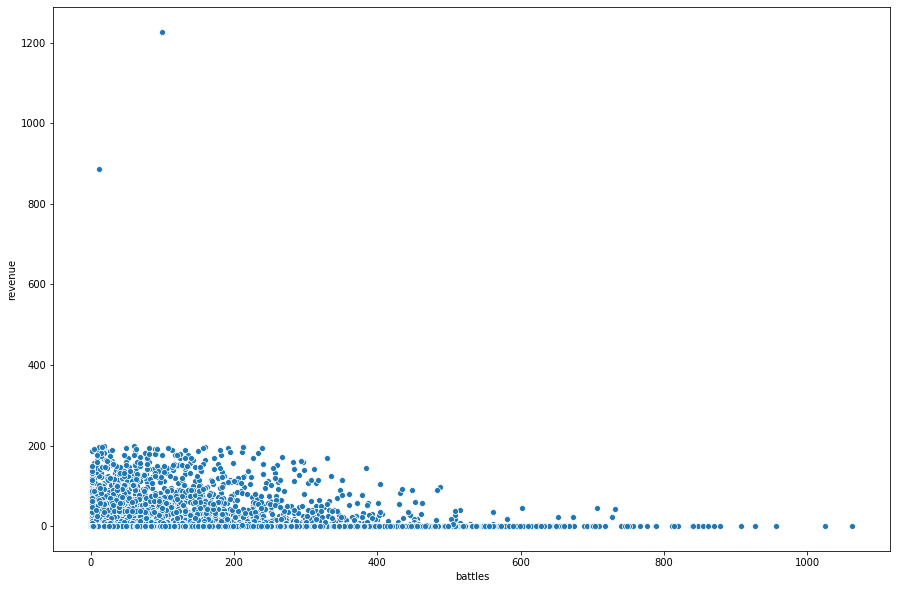

In [72]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=hot_time_data.battles, y = hot_time_data.revenue)

In [ ]:
#need accumulation on players on hot time